<a href="https://colab.research.google.com/github/AR-Karthik/ETG-MachineLearningCourse/blob/main/DecisionTree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import os
import graphviz 
from sklearn.preprocessing import LabelEncoder

In [2]:
SimpleTree = pd.DataFrame({'Outlook': ['Overcast', 'Overcast', 'Overcast', 'Overcast','Overcast', 'Overcast', 'Rainy', 'Rainy','Rainy', 'Rainy', 'Sunny', 'Sunny','Sunny', 'Sunny'], 
              'Temperature': ['Cool', 'Hot', 'Mild', 'Cool','Hot', 'Mild', 'Cool', 'Mild','Cool', 'Mild', 'Hot', 'Mild','Hot', 'Mild'],
              'windy': [True, True, True, False, False, False, True, True, False, False, True, True, False, False],
              'Play': ['Yes', 'Yes', 'Yes', 'No','Yes', 'No', 'No', 'No','No', 'No', 'Yes', 'Yes','Yes', 'Yes']})

In [3]:
SimpleTree

,Outlook,Temperature,windy,Play
0,Overcast,Cool,True,Yes
1,Overcast,Hot,True,Yes
2,Overcast,Mild,True,Yes
3,Overcast,Cool,False,No
4,Overcast,Hot,False,Yes
5,Overcast,Mild,False,No
6,Rainy,Cool,True,No
7,Rainy,Mild,True,No
8,Rainy,Cool,False,No
9,Rainy,Mild,False,No


In [4]:
Outlook_Enc = LabelEncoder()
Temperature_Enc = LabelEncoder()
Windy_Enc = LabelEncoder()
Play_Enc = LabelEncoder()

In [5]:
SimpleTree['Outlook_Enc'] = Outlook_Enc.fit_transform(SimpleTree['Outlook'])
SimpleTree['Temperature_Enc'] = Temperature_Enc.fit_transform(SimpleTree['Temperature'])
SimpleTree['Windy_Enc'] = Windy_Enc.fit_transform(SimpleTree['windy'])
SimpleTree['Play_Enc'] = Play_Enc.fit_transform(SimpleTree['Play'])

In [6]:
SimpleTree

,Outlook,Temperature,windy,Play,Outlook_Enc,Temperature_Enc,Windy_Enc,Play_Enc
0,Overcast,Cool,True,Yes,0,0,1,1
1,Overcast,Hot,True,Yes,0,1,1,1
2,Overcast,Mild,True,Yes,0,2,1,1
3,Overcast,Cool,False,No,0,0,0,0
4,Overcast,Hot,False,Yes,0,1,0,1
5,Overcast,Mild,False,No,0,2,0,0
6,Rainy,Cool,True,No,1,0,1,0
7,Rainy,Mild,True,No,1,2,1,0
8,Rainy,Cool,False,No,1,0,0,0
9,Rainy,Mild,False,No,1,2,0,0


In [7]:
# Get one hot encoding of target column
one_hot = pd.get_dummies(SimpleTree['Outlook'])
# Drop column B as it is now encoded
#df = df.drop('B',axis = 1)
# Join the encoded df
SimpleTree = SimpleTree.join(one_hot)
SimpleTree


,Outlook,Temperature,windy,Play,Outlook_Enc,Temperature_Enc,Windy_Enc,Play_Enc,Overcast,Rainy,Sunny
0,Overcast,Cool,True,Yes,0,0,1,1,1,0,0
1,Overcast,Hot,True,Yes,0,1,1,1,1,0,0
2,Overcast,Mild,True,Yes,0,2,1,1,1,0,0
3,Overcast,Cool,False,No,0,0,0,0,1,0,0
4,Overcast,Hot,False,Yes,0,1,0,1,1,0,0
5,Overcast,Mild,False,No,0,2,0,0,1,0,0
6,Rainy,Cool,True,No,1,0,1,0,0,1,0
7,Rainy,Mild,True,No,1,2,1,0,0,1,0
8,Rainy,Cool,False,No,1,0,0,0,0,1,0
9,Rainy,Mild,False,No,1,2,0,0,0,1,0


In [8]:
x = SimpleTree[['Outlook_Enc', 'Temperature_Enc', 'Windy_Enc']]
y = SimpleTree['Play_Enc']

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [10]:
clf.predict(x)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X") 

'X.pdf'

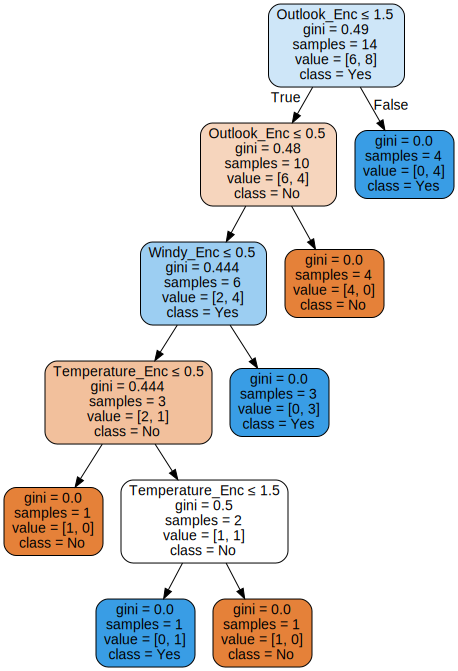

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=x.columns,  
                      class_names=['No', 'Yes'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

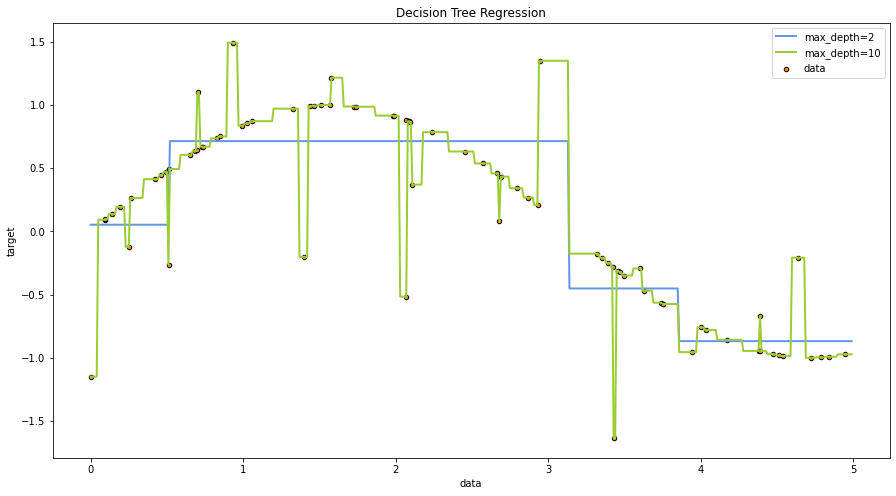

In [13]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,8))

plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#Exercise

In [14]:
X, y = load_iris(return_X_y=True)

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])